In [8]:
#creating fake income/age clusters for N people in k clusters
import numpy as np
def createClusteredData(N,k):
    pointsPerCluster=float(N)/k
    x=[]
    y=[]
    for i in range (k):
        incomeCentroid=np.random.uniform(20000,200000)
        ageCentroid=np.random.uniform(20,70)
        for j in range(int(pointsPerCluster)):
            x.append([np.random.normal(incomeCentroid,10000),np.random.normal(ageCentroid,2)])
            y.append(i)
    x=np.array(x)
    y=np.array(y)
    
    return x,y

C:\Users\Ghost\AppData\Local\Temp\ipykernel_6056\1415595235.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(x[:,0],x[:,1],c=y.astype(np.float))


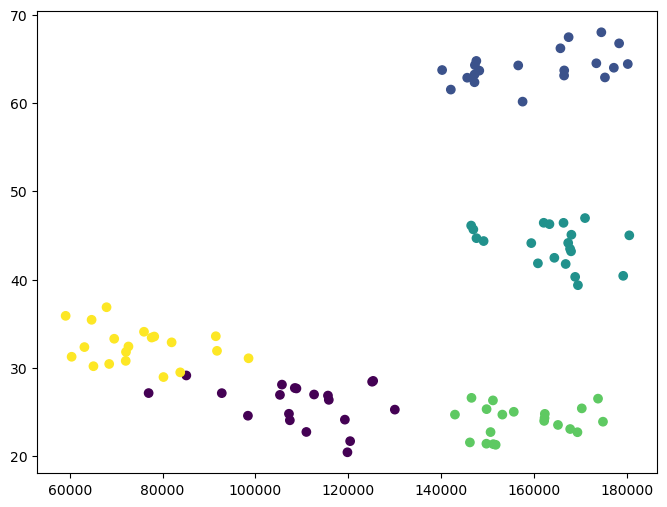

In [9]:
import matplotlib.pyplot as plt
(x,y)=createClusteredData(100,5)

plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=y.astype(np.float))
plt.show()

In [10]:
#using linear SVC to partition our graphs to clusters
from sklearn import svm,datasets

C=1
svc=svm.SVC(kernel='linear',C=C).fit(x,y)


C:\Users\Ghost\AppData\Local\Temp\ipykernel_6056\396493713.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(x[:,0],x[:,1],c=y.astype(np.float))


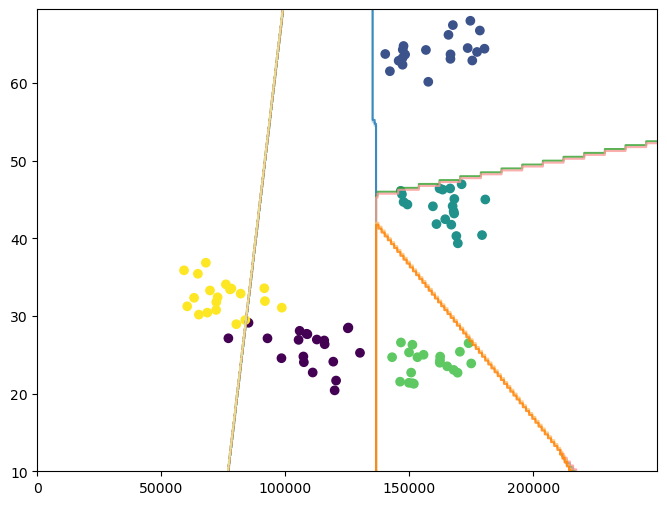

In [11]:
#setting dense mesh of points, rendering regions of each clusters as distinct colors
def plotPredictions(clf):
    xx,yy =np.meshgrid(np.arange(0,250000,10),
                       np.arange(10,70,0.5))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    plt.figure(figsize=(8,6))
    z=z.reshape(xx.shape)
    plt.contour(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(x[:,0],x[:,1],c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)